<a href="https://colab.research.google.com/github/ffahmed/webagent/blob/main/webagent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("")

In [ ]:
!pip install langchain_google_genai

In [59]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain_core.messages import HumanMessage

custom_prompt = """
You are an intelligent agent that is expert in understanding
html forms and json data with form key value information.
Given htmlFormInfo and jsonData you can generate a mapping from json data keys to CSS selectors in the html
and return the corresponding mapping in JSON string

Here is the sample INPUTS and OUTPUT

INPUTS:

htmlFormInfo:

<div class="form-row">
  <label>Name of Attorney or Representative</label>
  <div class="form-row">
      <label for="family-name">2.a. Family Name (Last Name)</label>
      <input type="text" id="family-name" name="family-name">
  </div>
  <div class="form-row">
      <label for="given-name">2.b. Given Name (First Name)</label>
      <input type="text" id="given-name" name="given-name">
  </div>
  <div class="form-row">
      <label for="middle-name">2.c. Middle Name</label>
      <input type="text" id="middle-name" name="middle-name">
  </div>
</div>

jsonData:

{{"attorney.family_name": "Doe",
"attorney.first_name": "John",
"attorney.middle_name": "Michael"}}


OUTPUT:

JSON:
{{
  "attorney.first_name": "input[name='given-name']",
  "attorney.family_name": "input[name='family-name']",
  "attorney.middle_name": "input[name='middle-name']",
}}

NOTE: Output will contain a json string like above example. Verify if its parsable by json before outputting.
Prepend the output with "OUTPUT_JSON######". and nothing else.

Now generate mapping for the following inputs

INPUTS:

htmlFormInfo:

{htmlFormInfo}

jsonData:

{jsonData}

OUTPUT:

"""

prompt_template = PromptTemplate(
    input_variables=["htmlFormInfo", "jsonData"],
    template=custom_prompt
)

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

htmlFormInfo = """
<div class="form-row">
  <label>Name of Attorney or Representative</label>
  <div class="form-row">
      <label for="family-name">2.a. Family Name (Last Name)</label>
      <input type="text" id="family-name" name="family-name">
  </div>
  <div class="form-row">
      <label for="given-name">2.b. Given Name (First Name)</label>
      <input type="text" id="given-name" name="given-name">
  </div>
  <div class="form-row">
      <label for="middle-name">2.c. Middle Name</label>
      <input type="text" id="middle-name" name="middle-name">
  </div>
</div>
"""

jsonData = """
{'attorney.family_name': 'Doe', 'attorney.first_name': 'John', 'attorney.middle_name': 'Michael'}
"""

prompt = prompt_template.format(htmlFormInfo=htmlFormInfo, jsonData=jsonData)
# print(prompt)

# Get the LLM response.
# response = llm(prompt)
message = llm.invoke([HumanMessage(content=prompt)])
# Extract the string content
response = message.content

print((response.split("######")[1]).strip())


{"attorney.first_name": "input[name='given-name']", "attorney.family_name": "input[name='family-name']", "attorney.middle_name": "input[name='middle-name']"}


In [ ]:
!apt update
!apt install chromium-chromedriver -y
!pip install selenium



In [ ]:
# I will be using selenium for google colab for demo https://github.com/jpjacobpadilla/Google-Colab-Selenium
%pip install google-colab-selenium

In [ ]:
%pip install google-colab-selenium[undetected]

In [ ]:
# Test selenium
import google_colab_selenium as gs
from IPython.display import Image, display

driver = gs.Chrome()

driver.get("https://practicetestautomation.com/practice-test-login/")
time.sleep(2)  # Allow time for the page to load.

# Locate and fill form fields.
email_field = driver.find_element(By.ID, "username")
password_field = driver.find_element(By.ID, "password")
email_field.send_keys("test@example.com")
password_field.send_keys("password123")

email_value = email_field.get_attribute("value")
password_value = password_field.get_attribute("value")
print("Email field contains:", email_value)
print("Password field contains:", password_value)

# Try see if it's filled
screenshot = driver.get_screenshot_as_png()
display(Image(data=screenshot))

# Print the page source after submission.
# print(driver.page_source)

driver.quit()

{'attorney.online_account_number': 'A123456789', 'attorney.family_name': 'Doe', 'attorney.first_name': 'John', 'attorney.middle_name': 'Michael', 'attorney.address_line_1': '123 Legal Avenue', 'attorney.unit_type': 'Ste', 'attorney.address_line_2': '405', 'attorney.city': 'Boston', 'attorney.state': 'Massachusetts', 'attorney.zip_code': '02108', 'attorney.province': '', 'attorney.country': 'United States', 'attorney.daytime_phone': '(617) 555-7890', 'attorney.email': 'mdoe@legalfirm.com', 'attorney.fax': '6175554321', 'attorney.attorney_eligible': 'yes', 'attorney.licensing_state': 'MA', 'attorney.bar_number': 'BBO#654321', 'attorney.subject_to_restrictions': 'no', 'attorney.law_firm': 'Doe & Associates Legal Group', 'attorney.is_nonprofit_rep': False, 'attorney.org_name': '', 'attorney.accreditation_date': '', 'attorney.associated_with_student': 'no', 'attorney.law_student': '', 'attorney.administrative_case': True, 'attorney.administrative_matter': 'I-485 Application to Register Perm

<IPython.core.display.Javascript object>

{"attorney.online_account_number": "input[name='online-account']", "attorney.family_name": "input[name='family-name']", "attorney.first_name": "input[name='given-name']", "attorney.middle_name": "input[name='middle-name']", "attorney.address_line_1": "input[name='street-number']", "attorney.unit_type": "input[name='apt-type'][value='ste']", "attorney.address_line_2": "input[name='apt-number']", "attorney.city": "input[name='city']", "attorney.state": "select[name='state']", "attorney.zip_code": "input[name='zip']", "attorney.province": "input[name='province']", "attorney.country": "input[name='country']", "attorney.daytime_phone": "input[name='daytime-phone']", "attorney.email": "input[name='email']", "attorney.fax": "input[name='fax']", "attorney.attorney_eligible": "input[name='eligibility'][value='attorney']", "attorney.licensing_state": "input[name='licensing-authority']", "attorney.bar_number": "input[name='bar-number']", "attorney.subject_to_restrictions": "input[name='subject-to

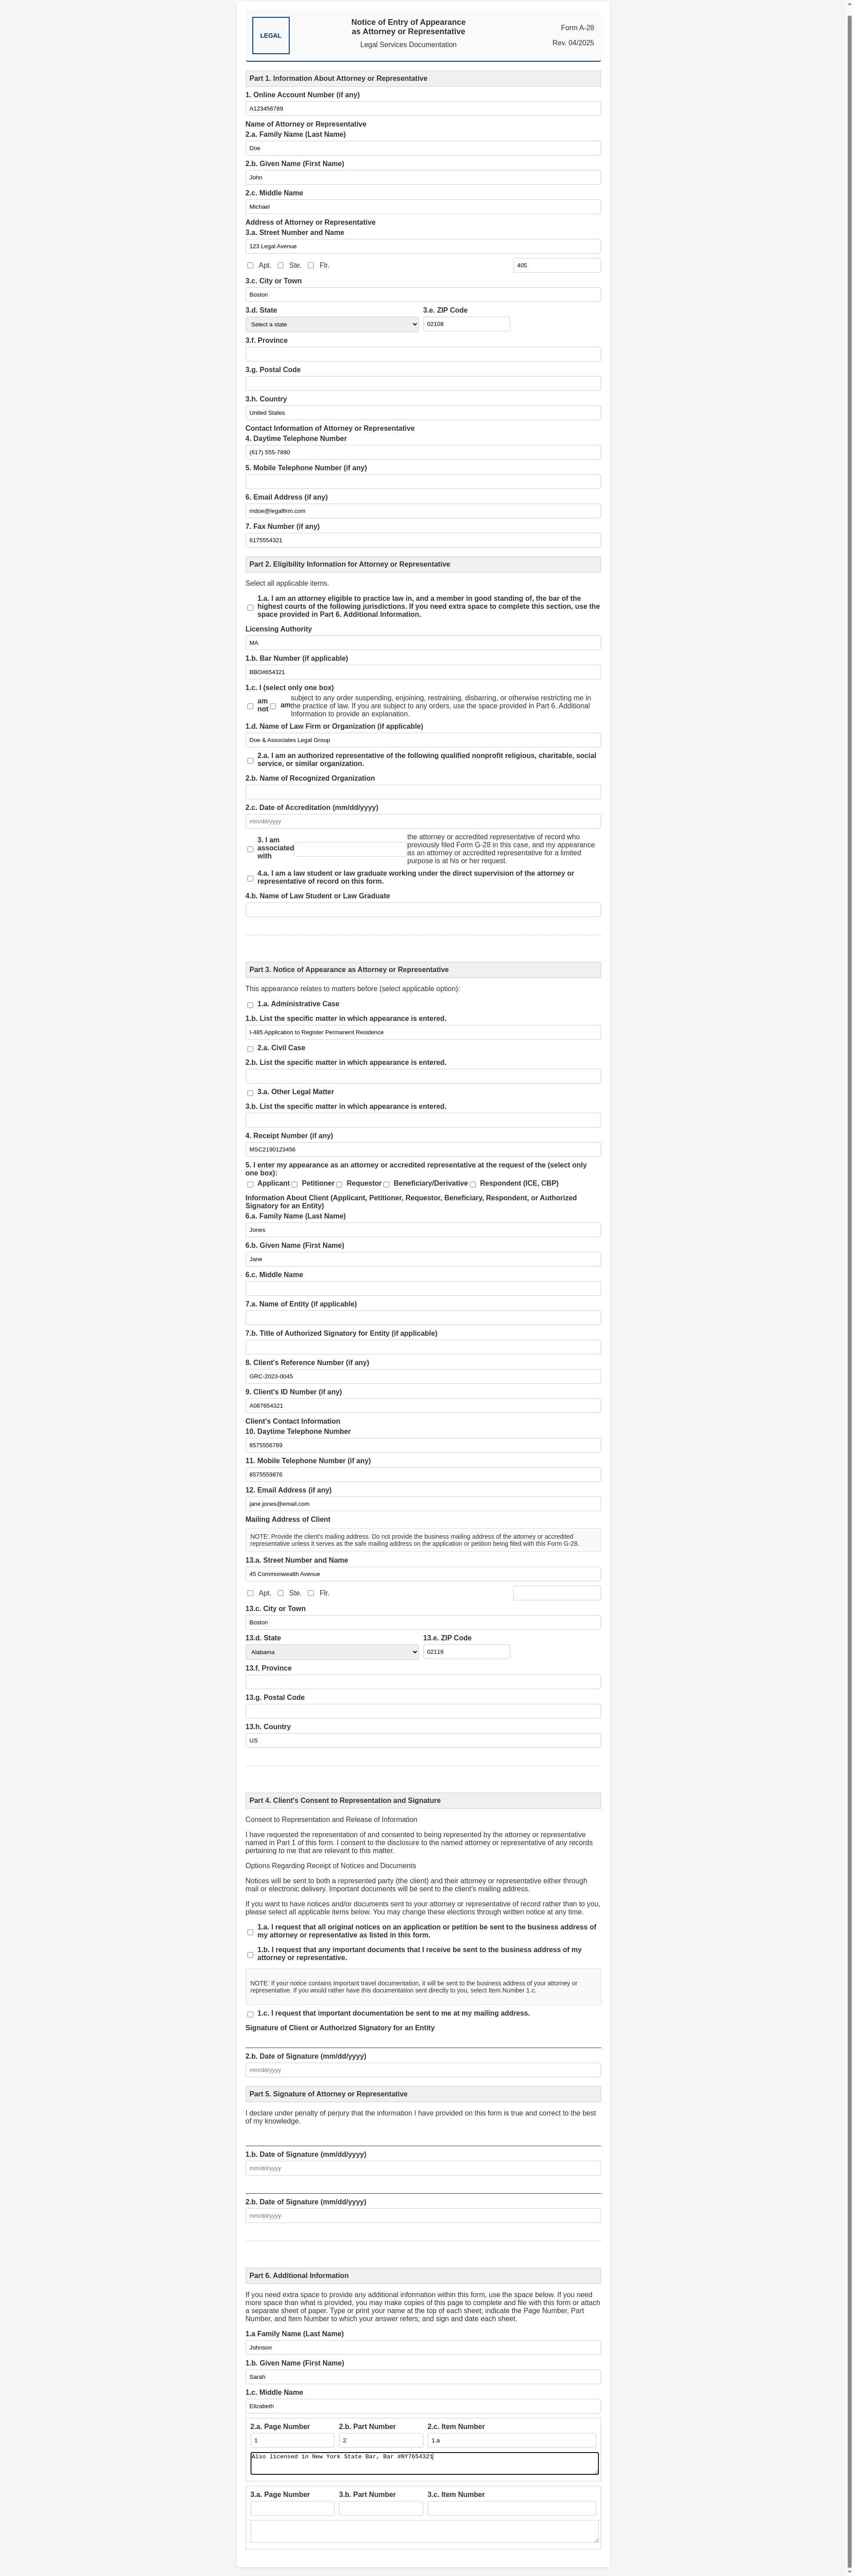

In [65]:
# we will ask the LLM to find the CSS selectors given the HTML of the form and sample data.
# for ease we can parse the sample data to create fileds in nested format.
import time
import json
from selenium.webdriver.common.by import By
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain_core.messages import HumanMessage


# Using LLM gets html form to json mapping, Here for simplicity and time constraint I handled text only
def getMappingUsingLLM(htmlFormInfo, jsonData):
  custom_prompt = """
  You are an intelligent agent that is expert in understanding
  html forms and json data with form key value information.
  Given htmlFormInfo and jsonData you can generate a mapping from json data keys to CSS selectors in the html
  and return the corresponding mapping in JSON string

  Here is the sample INPUTS and OUTPUT

  INPUTS:

  htmlFormInfo:

  <div class="form-row">
    <label>Name of Attorney or Representative</label>
    <div class="form-row">
        <label for="family-name">2.a. Family Name (Last Name)</label>
        <input type="text" id="family-name" name="family-name">
    </div>
    <div class="form-row">
        <label for="given-name">2.b. Given Name (First Name)</label>
        <input type="text" id="given-name" name="given-name">
    </div>
    <div class="form-row">
        <label for="middle-name">2.c. Middle Name</label>
        <input type="text" id="middle-name" name="middle-name">
    </div>
  </div>

  jsonData:

  {{"attorney.family_name": "Doe",
  "attorney.first_name": "John",
  "attorney.middle_name": "Michael"}}


  OUTPUT:

  JSON:
  {{
    "attorney.first_name": "input[name='given-name']",
    "attorney.family_name": "input[name='family-name']",
    "attorney.middle_name": "input[name='middle-name']",
  }}

  NOTE: Output will contain a json string like above example. Verify if its parsable by json before outputting.
  Prepend the output with "OUTPUT_JSON######". and nothing else.

  Now generate mapping for the following inputs

  INPUTS:

  htmlFormInfo:

  {htmlFormInfo}

  jsonData:

  {jsonData}

  OUTPUT:

  """

  prompt_template = PromptTemplate(
      input_variables=["htmlFormInfo", "jsonData"],
      template=custom_prompt
  )

  llm = ChatGoogleGenerativeAI(
      model="gemini-1.5-pro",
      temperature=0,
      max_tokens=None,
      timeout=None,
      max_retries=2,
      # other params...
  )

  prompt = prompt_template.format(htmlFormInfo=htmlFormInfo, jsonData=jsonData)
  # print(prompt)

  message = llm.invoke([HumanMessage(content=prompt)])
  # Extract the string content
  response = message.content
  # print (response)
  mapping = (response.split("######")[1]).strip()
  print(mapping)
  return mapping

def inputValuesIntoForm(driver, htmlToData, parsedData):
    for key, selector in htmlToData.items():
        # skip signature
        if "signature" in key:
            print(f"Skipping field {key} (signature-related).")
            continue

        value = parsedData.get(key, "")
        if value:
            try:
                element = driver.find_element(By.CSS_SELECTOR, selector)
                element.clear()
                element.send_keys(value)
                print(f"Filled field '{key}' with value: {value}")
            except Exception as e:
                print(f"Could not fill field '{key}': {e}")
        else:
            print(f"No data found for field '{key}'.")

# map Html form to mock data
def mapHtmlToDataField(html, data):
    # testing mapping
    # mapping = {
    #     "attorney.first_name": "input[name='given-name']",
    #     "attorney.family_name": "input[name='family-name']",
    #     "attorney.middle_name": "input[name='middle-name']",

    #     # Add more mappings as needed.
    # }

    mapping = getMappingUsingLLM(html, data)
    mapping = json.loads(mapping)
    # mapping = json.loads("""{"attorney.online_account_number": "input[name='online-account']", "attorney.family_name": "input[name='family-name']", "attorney.first_name": "input[name='given-name']", "attorney.middle_name": "input[name='middle-name']", "attorney.address_line_1": "input[name='street-number']", "attorney.unit_type": "input[name='apt-type']", "attorney.address_line_2": "input[name='apt-number']", "attorney.city": "input[name='city']", "attorney.state": "select[name='state']", "attorney.zip_code": "input[name='zip']", "attorney.province": "input[name='province']", "attorney.country": "input[name='country']", "attorney.daytime_phone": "input[name='daytime-phone']", "attorney.email": "input[name='email']", "attorney.fax": "input[name='fax']", "attorney.attorney_eligible": "input[name='eligibility'][value='attorney']", "attorney.licensing_state": "input[name='licensing-authority']", "attorney.bar_number": "input[name='bar-number']", "attorney.subject_to_restrictions": "input[name='subject-to-orders'][value='am']", "attorney.law_firm": "input[name='law-firm']", "attorney.is_nonprofit_rep": "input[name='eligibility'][value='accredited']", "attorney.org_name": "input[name='recognized-org']", "attorney.accreditation_date": "input[name='accreditation-date']", "attorney.associated_with_student": "input[name='eligibility'][value='associated']", "attorney.law_student": "input[name='associated-with-name']", "attorney.administrative_case": "input[name='agency'][value='option1']", "attorney.administrative_matter": "input[name='option1-matter']", "attorney.civil_case": "input[name='agency'][value='option2']", "attorney.civil_matter": "input[name='option2-matter']", "attorney.other_legal": "input[name='agency'][value='option3']", "attorney.other_legal_matter": "input[name='option3-matter']", "attorney.receipt_number": "input[name='receipt-number']", "attorney.client_type": "input[name='client-type'][value='beneficiary']", "client.family_name": "input[name='client-family-name']", "client.first_name": "input[name='client-given-name']", "client.entity_name": "input[name='entity-name']", "client.entity_title": "input[name='entity-title']", "client.reference_number": "input[name='client-account-number']", "client.id_number": "input[name='client-id-number']", "client.daytime_phone": "input[name='client-daytime-phone']", "client.mobile_phone": "input[name='client-mobile-phone']", "client.email": "input[name='client-email']", "client.address_line_1": "input[name='client-street']", "client.unit_type": "input[name='client-apt-type']", "client.address_line_2": "input[name='client-apt-number']", "client.city": "input[name='client-city']", "client.state": "select[name='client-state']", "client.zip_code": "input[name='client-zip']", "client.province": "input[name='client-province']", "client.country": "input[name='client-country']", "client.send_notices_to_attorney": "input[name='notices-option']", "client.send_documents_to_attorney": "input[name='documents-option']", "client.send_documents_to_client": "input[name='docs-option']", "client.signature_date": "input[name='client-signature-date']", "attorney_signature_date": "input[name='attorney-signature-date']", "additional_signature_date": "input[name='student-signature-date']", "part6.additional_info.family_name": "input[name='add-info-family-name']", "part6.additional_info.given_name": "input[name='add-info-given-name']", "part6.additional_info.middle_name": "input[name='add-info-middle-name']", "part6.additional_info.entries.0.page_number": "input[name='add-info-page-2a']", "part6.additional_info.entries.0.part_number": "input[name='add-info-part-2b']", "part6.additional_info.entries.0.item_number": "input[name='add-info-item-2c']", "part6.additional_info.entries.0.additional_info": "textarea[name='add-info-text-2d']"}""")
    return mapping

# make it a flat dictionary for LLM to easy map
def parseMakeDict(d, parent='', split='.'):
    items = {}
    if isinstance(d, dict):
        for k, v in d.items():
            curKey = f"{parent}{split}{k}" if parent else k
            if isinstance(v, dict):
                items.update(parseMakeDict(v, curKey, split=split))
            elif isinstance(v, list):

                for idx, item in enumerate(v):
                    list_key = f"{curKey}{split}{idx}"
                    if isinstance(item, dict):
                        items.update(parseMakeDict(item, list_key, split=split))
                    else:
                        items[list_key] = item
            else:
                items[curKey] = v
    # special care for list,
    elif isinstance(d, list):
        for idx, item in enumerate(d):
            curKey = f"{parent}{split}{idx}" if parent else str(idx)
            if isinstance(item, dict):
                items.update(parseMakeDict(item, curKey, split=split))
            else:
                items[curKey] = item
    return items


def main():
  mockData = {
      "attorney": {
          "online_account_number": "A123456789",
          "family_name": "Doe",
          "first_name": "John",
          "middle_name": "Michael",
          "address_line_1": "123 Legal Avenue",
          "unit_type": "Ste",
          "address_line_2": "405",
          "city": "Boston",
          "state": "Massachusetts",
          "zip_code": "02108",
          "province": "",
          "country": "United States",
          "daytime_phone": "(617) 555-7890",
          "email": "mdoe@legalfirm.com",
          "fax": "6175554321",
          "attorney_eligible": "yes",
          "licensing_state": "MA",
          "bar_number": "BBO#654321",
          "subject_to_restrictions": "no",
          "law_firm": "Doe & Associates Legal Group",
          "is_nonprofit_rep": False,
          "org_name": "",
          "accreditation_date": "",
          "associated_with_student": "no",
          "law_student": "",
          "administrative_case": True,
          "administrative_matter": "I-485 Application to Register Permanent Residence",
          "civil_case": False,
          "civil_matter": "",
          "other_legal": False,
          "other_legal_matter": "",
          "receipt_number": "MSC2190123456",
          "client_type": "Beneficiary",
      },
      "client": {
          "family_name": "Jones",
          "first_name": "Jane",
          "entity_name": "",
          "entity_title": "",
          "reference_number": "GRC-2023-0045",
          "id_number": "A087654321",
          "daytime_phone": "8575556789",
          "mobile_phone": "8575559876",
          "email": "jane.jones@email.com",
          "address_line_1": "45 Commonwealth Avenue",
          "unit_type": "",
          "address_line_2": "",
          "city": "Boston",
          "state": "MA",
          "zip_code": "02116",
          "province": "",
          "country": "US",
          "send_notices_to_attorney": "Y",
          "send_documents_to_attorney": "Y",
          "send_documents_to_client": "N",
          "signature_date": "",
      },
      "attorney_signature_date": "",
      "additional_signature_date": "",
      "part6": {
          "additional_info": {
              "family_name": "Johnson",
              "given_name": "Sarah",
              "middle_name": "Elizabeth",
              "entries": [
                  {
                      "page_number": "1",
                      "part_number": "2",
                      "item_number": "1.a",
                      "additional_info": "Also licensed in New York State Bar, Bar #NY7654321",
                  }
              ],
          }
      },
  }

  # make flat dictionary
  parsedData = parseMakeDict(mockData)
  print(parsedData)

  driver = gs.Chrome()

  driver.get("https://mendrika-alma.github.io/form-submission/")
  time.sleep(2)

  # assuming there will be form/body element. but here we can use LLM to detect the form as well
  # for time constraints I could not do it
  formElement = driver.find_element(By.TAG_NAME, "body")
  formHtml = formElement.get_attribute("outerHTML")
  # print (formHtml)

  htmlToData = mapHtmlToDataField(formHtml, parsedData)
  # print("html data mapping:", json.dumps(htmlToData, indent=2))

  # fill form
  inputValuesIntoForm(driver, htmlToData, parsedData)

  # For demo we show the screenshot as I am working on collab
  # Get the full height of the page.
  total_height = driver.execute_script("return document.body.parentNode.scrollHeight")
  driver.set_window_size(1920, total_height)
  time.sleep(1)
  # take screen shot after resized
  screenshot = driver.get_screenshot_as_png()
  display(Image(data=screenshot))

if __name__ == "__main__":
    main()